<b> Computational Social Science Project 2 <b>

The aim of this project is to develop machine learning models to predict diabetes rates in US counties. 
We use data from Centers for Disease Control and Prevention (CDC) and the US Census Bureau.

In [1]:
#calling relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing dataset
mydata = pd.read_csv("/Users/shrutibathia/Desktop/diabetesinfo.csv")

In [3]:
# checking out the dataset
mydata.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,1001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,1003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,1005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,1007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,1009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [4]:
mydata.describe()

,CountyFIPS,race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_1,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
count,3220.000000,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,...,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3.220000e+03,3220.000000,3220.000000
mean,31393.605280,1.013323e+05,9.803687e+04,3295.423292,9.803687e+04,7.366104e+04,1.282022e+04,840.862422,90.346894,36.718634,...,7.412272e+04,1.906676e+04,1.549044e+04,7.827602e+04,3.809320e+04,4.018282e+04,99.439317,1.549044e+04,6850.940683,8639.495342
std,16292.078954,3.260964e+05,3.142309e+05,13032.711931,3.142309e+05,2.012548e+05,5.514027e+04,3534.196512,534.021931,300.672832,...,2.384994e+05,5.470009e+04,4.432602e+04,2.513513e+05,1.220023e+05,1.293948e+05,14.740158,4.432602e+04,19234.567636,25111.933583
min,1001.000000,7.500000e+01,6.000000e+01,0.000000,6.000000e+01,1.600000e+01,0.000000e+00,0.000000,0.000000,0.000000,...,6.900000e+01,1.900000e+01,1.200000e+01,7.100000e+01,3.600000e+01,3.100000e+01,70.800000,1.200000e+01,0.000000,10.000000
25%,19032.500000,1.121425e+04,1.090100e+04,169.750000,1.090100e+04,9.050250e+03,1.167500e+02,30.000000,0.000000,0.000000,...,8.314250e+03,2.583750e+03,2.111500e+03,8.691500e+03,4.355250e+03,4.285250e+03,93.000000,2.111500e+03,984.750000,1126.000000
50%,30024.000000,2.595050e+04,2.537900e+04,492.000000,2.537900e+04,2.161750e+04,8.380000e+02,114.000000,9.000000,0.000000,...,1.936550e+04,5.704500e+03,4.698500e+03,2.026050e+04,9.997500e+03,1.019050e+04,96.500000,4.698500e+03,2129.500000,2548.000000
75%,46105.500000,6.655225e+04,6.497525e+04,1742.500000,6.497525e+04,5.711775e+04,5.591000e+03,425.250000,48.000000,6.000000,...,4.906400e+04,1.435650e+04,1.171375e+04,5.200525e+04,2.557400e+04,2.664950e+04,100.800000,1.171375e+04,5234.000000,6314.500000
max,72153.000000,1.009805e+07,9.700372e+06,397680.000000,9.700372e+06,5.186859e+06,1.230494e+06,82699.000000,14104.000000,10609.000000,...,7.433332e+06,1.610630e+06,1.299277e+06,7.851531e+06,3.827779e+06,4.023752e+06,414.700000,1.299277e+06,561006.000000,738271.000000


In [5]:
mydata.shape

(3220, 95)

In [6]:
x = mydata["Diabetes_Number"]
y = mydata["Obesity_Number"]
z = mydata["race_total population"]


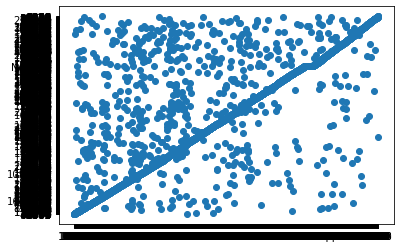

In [7]:
plt.scatter(x, y)
plt.shw()